#About dataset:
###World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.
#Our goal:
##"Predict heart attack with Lasso regression"
##I hope this be helpfull for our world!
###Lets start...



#1-Import our needed libaries
#2-Read library from google drive
#3-Analyz and visualize data and we trying to handle missing values if be in dataset
#4-we convert dataset values ​​to one scale
#5-make our model 
#6-predicting
#7-evaluate


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
df = pd.read_csv('/content/drive/MyDrive/MyFiles-Kaggle-AI/Resgression-Khosromoradi/Final test(Arad Rahmani)/framingham_heart_disease.csv')
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [ ]:
df.describe().T

count        mean        std     min     25%    50%  \
male             4238.0    0.429212   0.495022    0.00    0.00    0.0   
age              4238.0   49.584946   8.572160   32.00   42.00   49.0   
education        4133.0    1.978950   1.019791    1.00    1.00    2.0   
currentSmoker    4238.0    0.494101   0.500024    0.00    0.00    0.0   
cigsPerDay       4209.0    9.003089  11.920094    0.00    0.00    0.0   
BPMeds           4185.0    0.029630   0.169584    0.00    0.00    0.0   
prevalentStroke  4238.0    0.005899   0.076587    0.00    0.00    0.0   
prevalentHyp     4238.0    0.310524   0.462763    0.00    0.00    0.0   
diabetes         4238.0    0.025720   0.158316    0.00    0.00    0.0   
totChol          4188.0  236.721585  44.590334  107.00  206.00  234.0   
sysBP            4238.0  132.352407  22.038097   83.50  117.00  128.0   
diaBP            4238.0   82.893464  11.910850   48.00   75.00   82.0   
BMI              4219.0   25.802008   4.080111   15.54   23.07   25.4   
heartRate        4237.0   75.878924  12.026596   44.00   68.00   75.0   
glucose          3850.0   81.966753  23.959998   40.00   71.00   78.0   
TenYearCHD       4238.0    0.151958   0.359023    0.00    0.00    0.0   

                     75%    max  
male               1.000    1.0  
age               56.000   70.0  
education          3.000    4.0  
currentSmoker      1.000    1.0  
cigsPerDay        20.000   70.0  
BPMeds             0.000    1.0  
prevalentStroke    0.000    1.0  
prevalentHyp       1.000    1.0  
diabetes           0.000    1.0  
totChol          263.000  696.0  
sysBP            144.000  295.0  
diaBP             89.875  142.5  
BMI               28.040   56.8  
heartRate         83.000  143.0  
glucose           87.000  394.0  
TenYearCHD         0.000    1.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df.shape

(4238, 16)

In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

#1.As we can understand the education is not important in heart attak,we drop this columns and its not necessary to handle or use it in our prediction

###2.Due to the small number of samples and the large number of missing values, we cannot remove them because it will cause a lot of damage to our prediction, so we have to replace and manage them.

###3.I want to replace missing values with mean of each columns so we make variable for each columns and replace nan values with this values.

In [ ]:
df = df.drop(columns=['education']) 
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
cigsPerDayMean = round(df['cigsPerDay'].mean())
BPMedsMean = round(df['BPMeds'].mean())
totCholMean = round(df['totChol'].mean())
BMIMean = round(df['BMI'].mean())
heartRateMean = round(df['heartRate'].mean())
glucoseMean = round(df['glucose'].mean())

In [ ]:
df['cigsPerDay'].fillna(cigsPerDayMean, inplace=True)
df['BPMeds'].fillna(BPMedsMean, inplace=True)
df['totChol'].fillna(totCholMean, inplace=True)
df['BMI'].fillna(BMIMean, inplace=True)
df['heartRate'].fillna(heartRateMean, inplace=True)
df['glucose'].fillna(glucoseMean, inplace=True)

In [ ]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

##Now we visualize our dataset to understand better our features and deleting our outlier values to predict more and more accurate

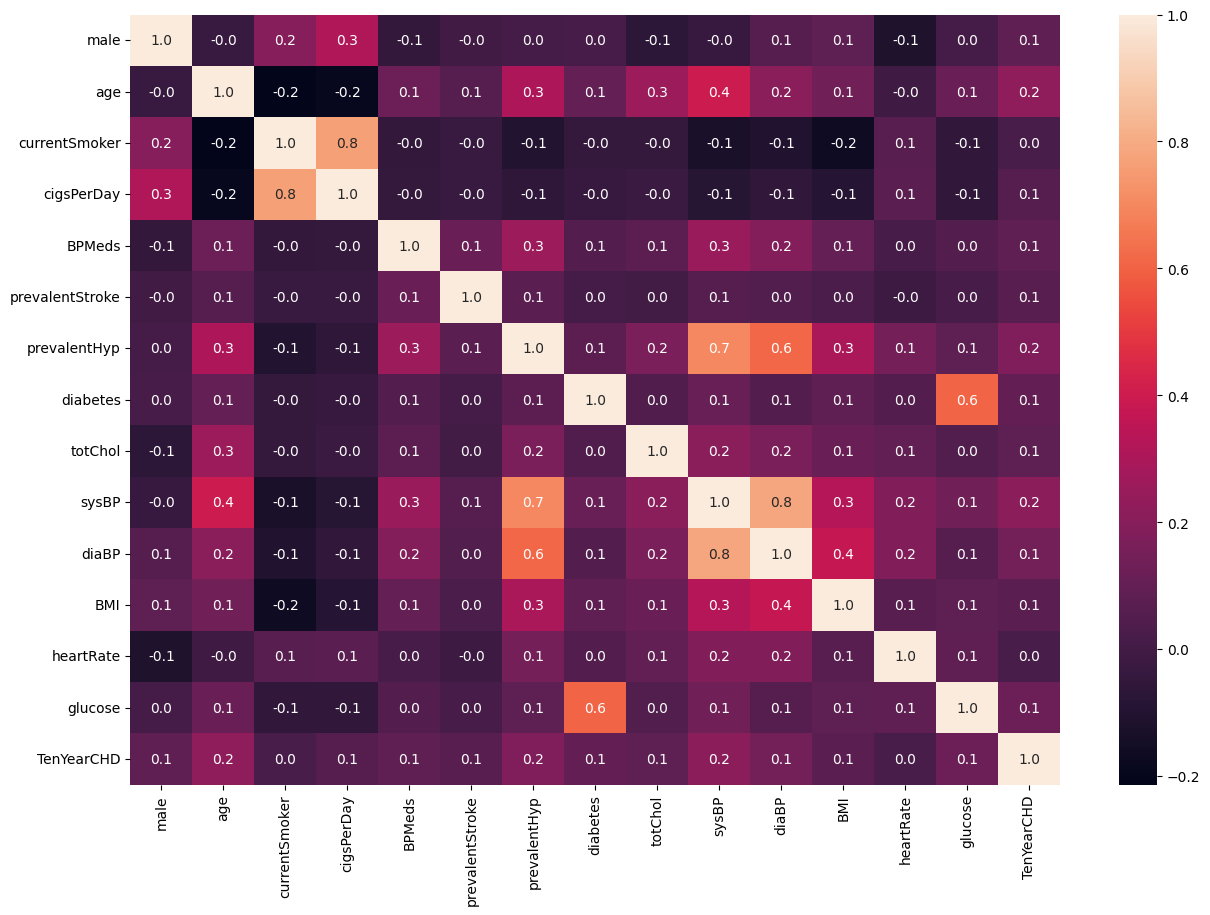

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f', ax=ax)
plt.show()

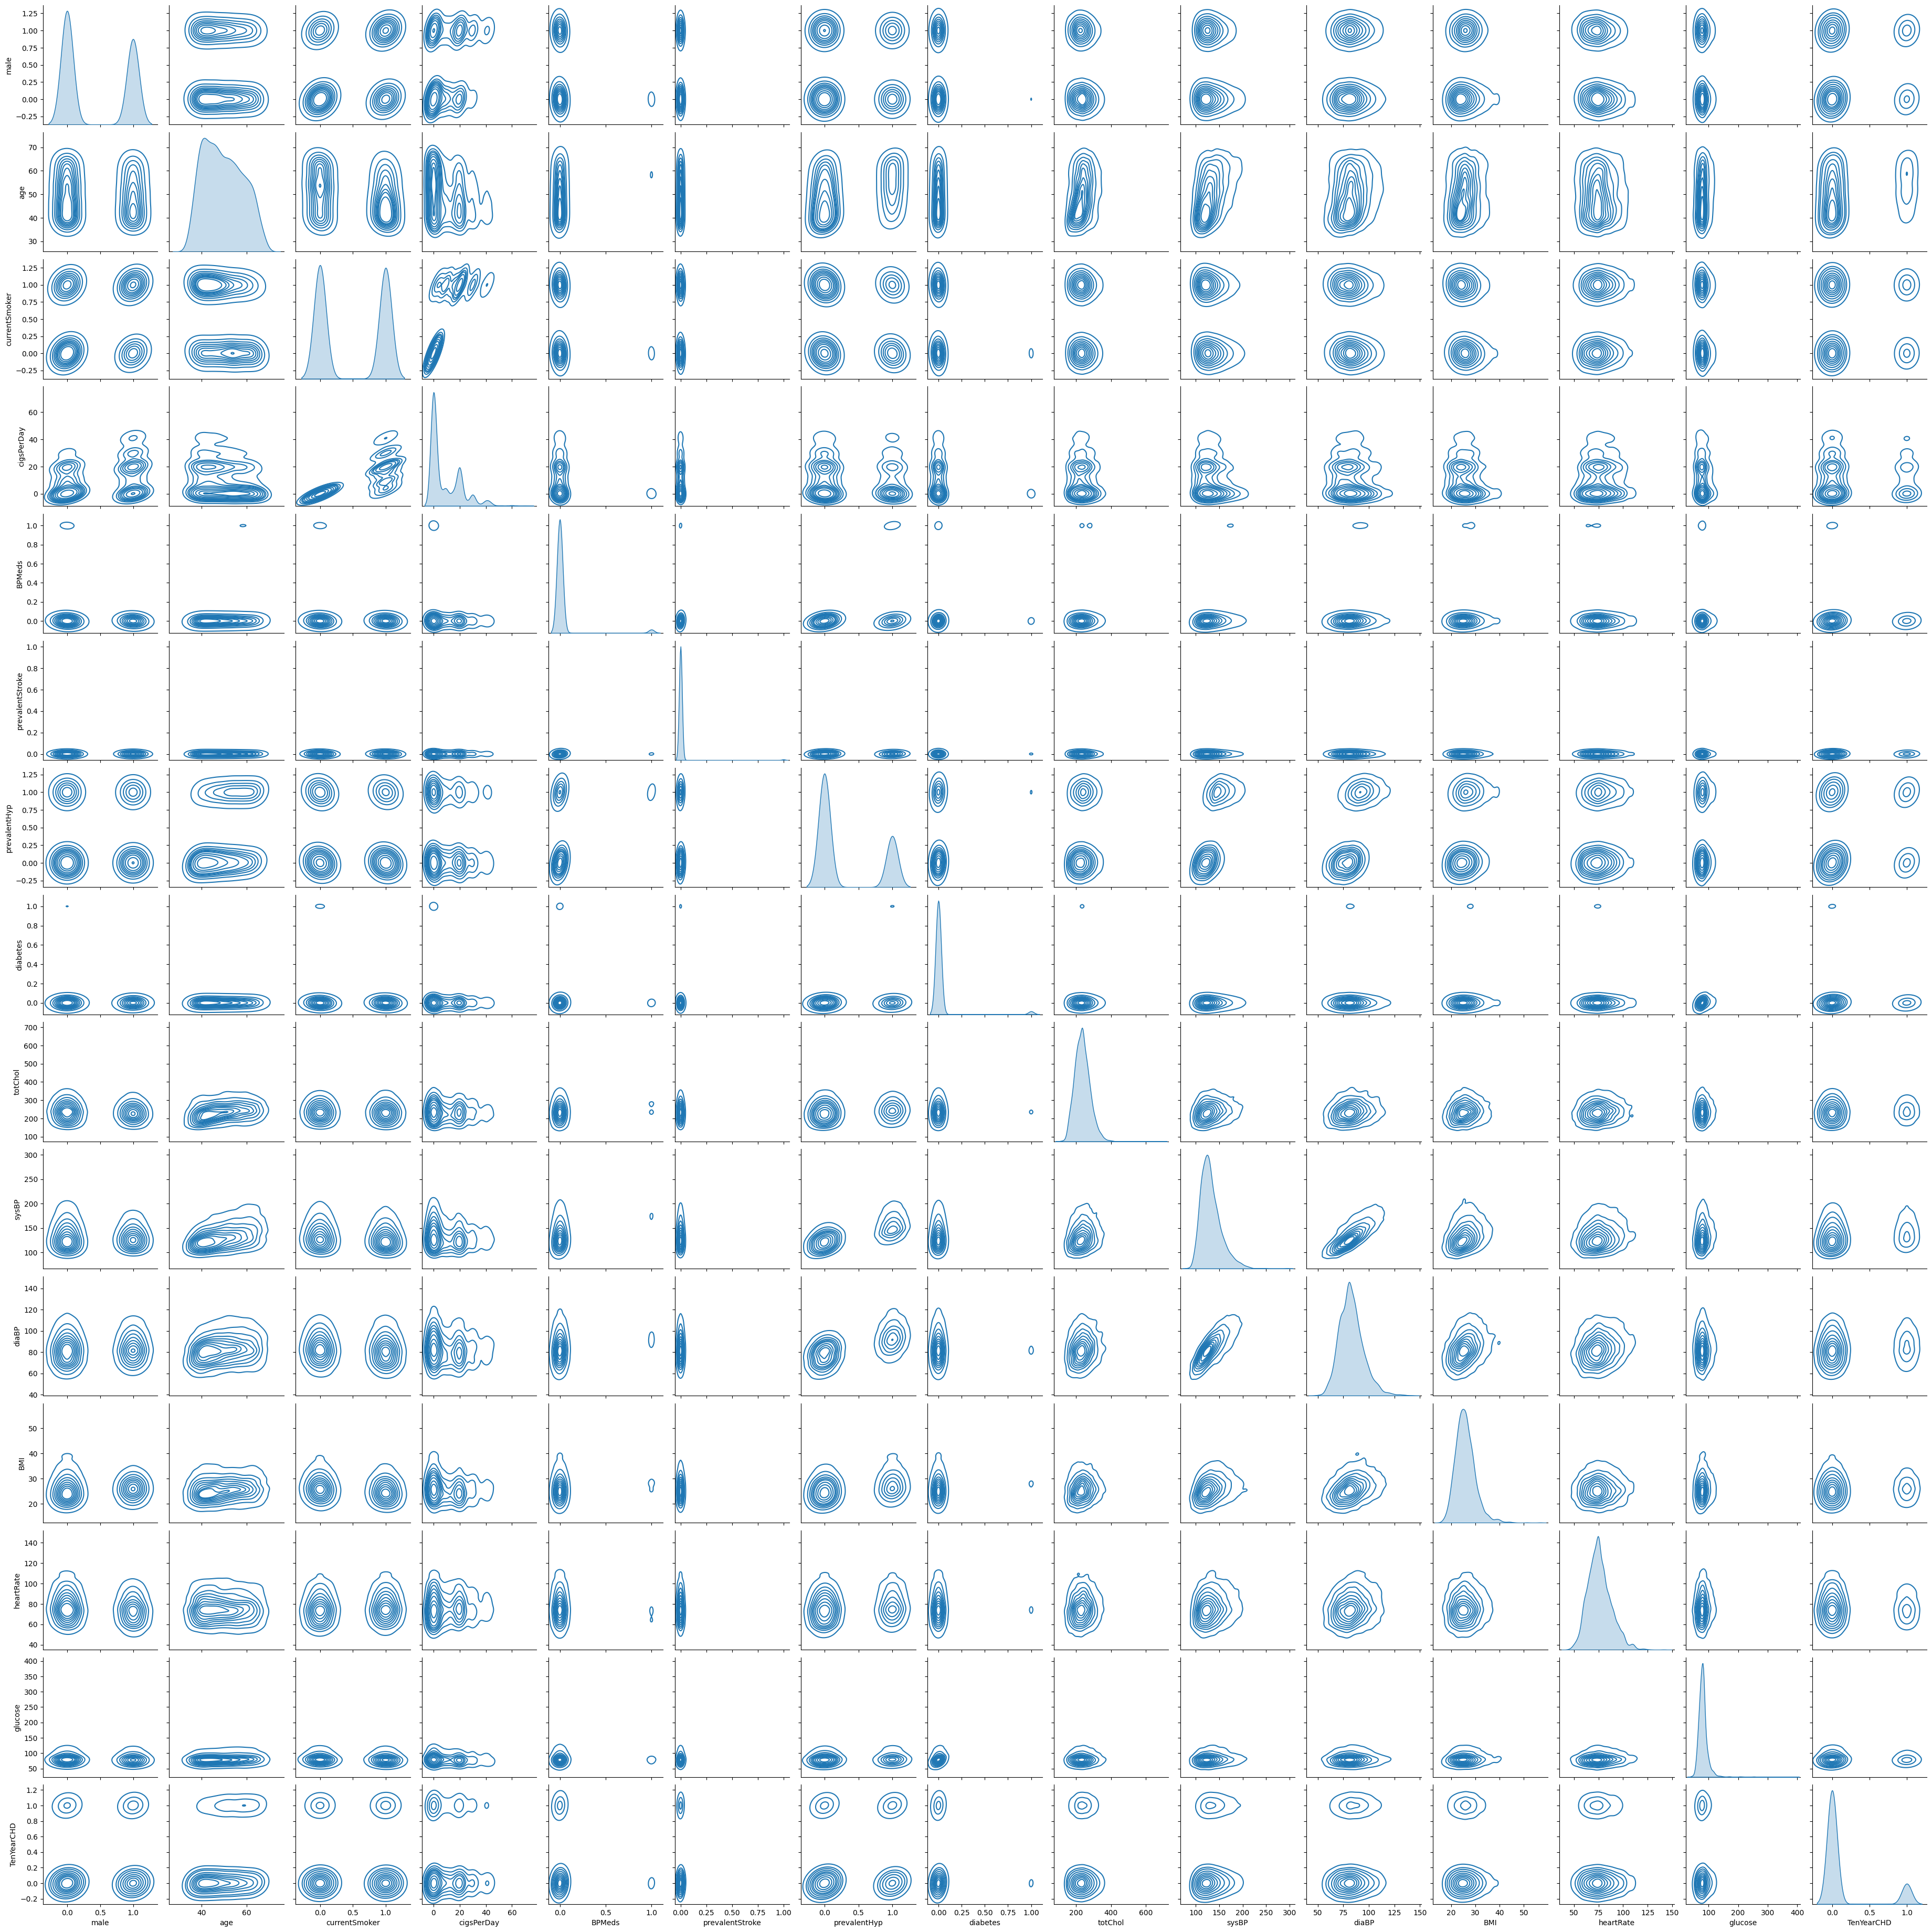

In [ ]:
sns.pairplot(df, kind="kde")

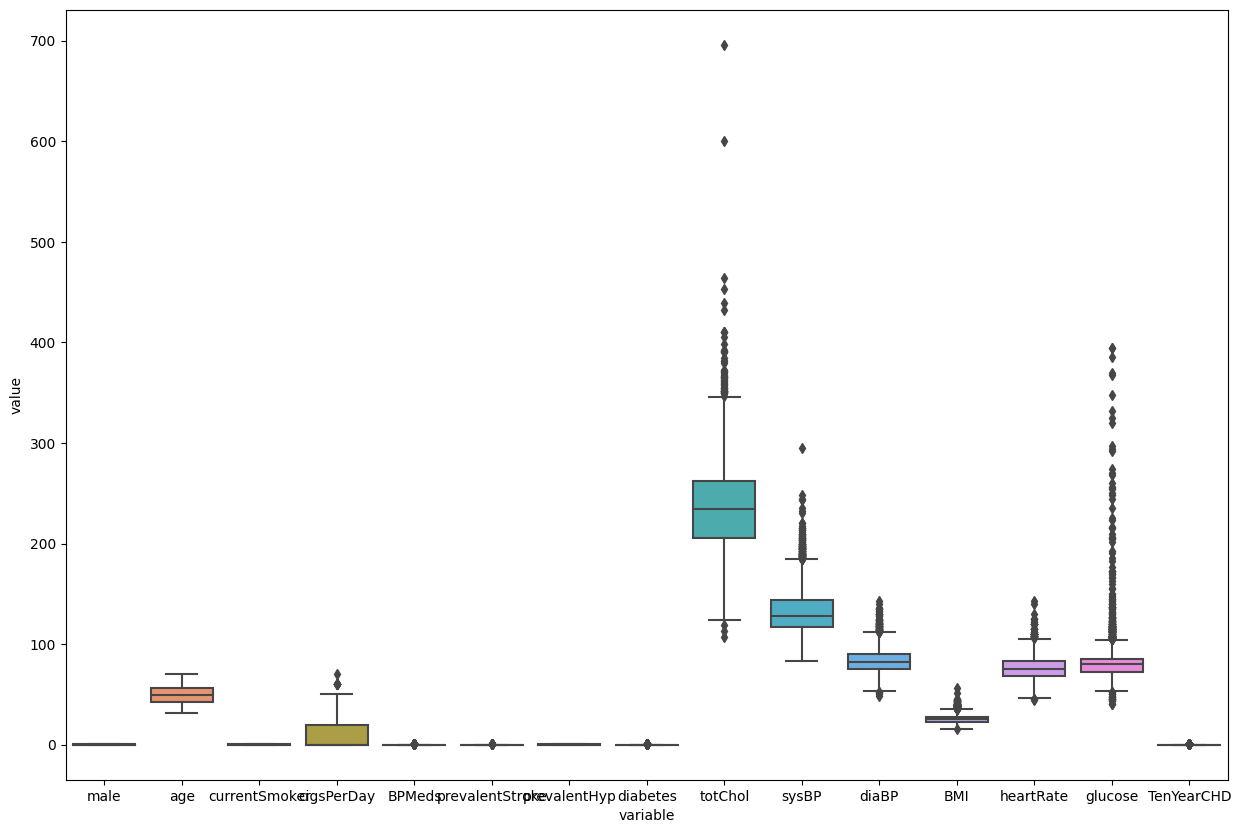

In [ ]:
all_data = [df.male, df.age, df.currentSmoker, df.cigsPerDay, df.BPMeds, df.prevalentStroke, df.prevalentHyp, df.diabetes, df.totChol, df.sysBP, df.BMI, df.heartRate, df.glucose]

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="variable", y="value", data=pd.melt(df), ax=ax)
plt.show()

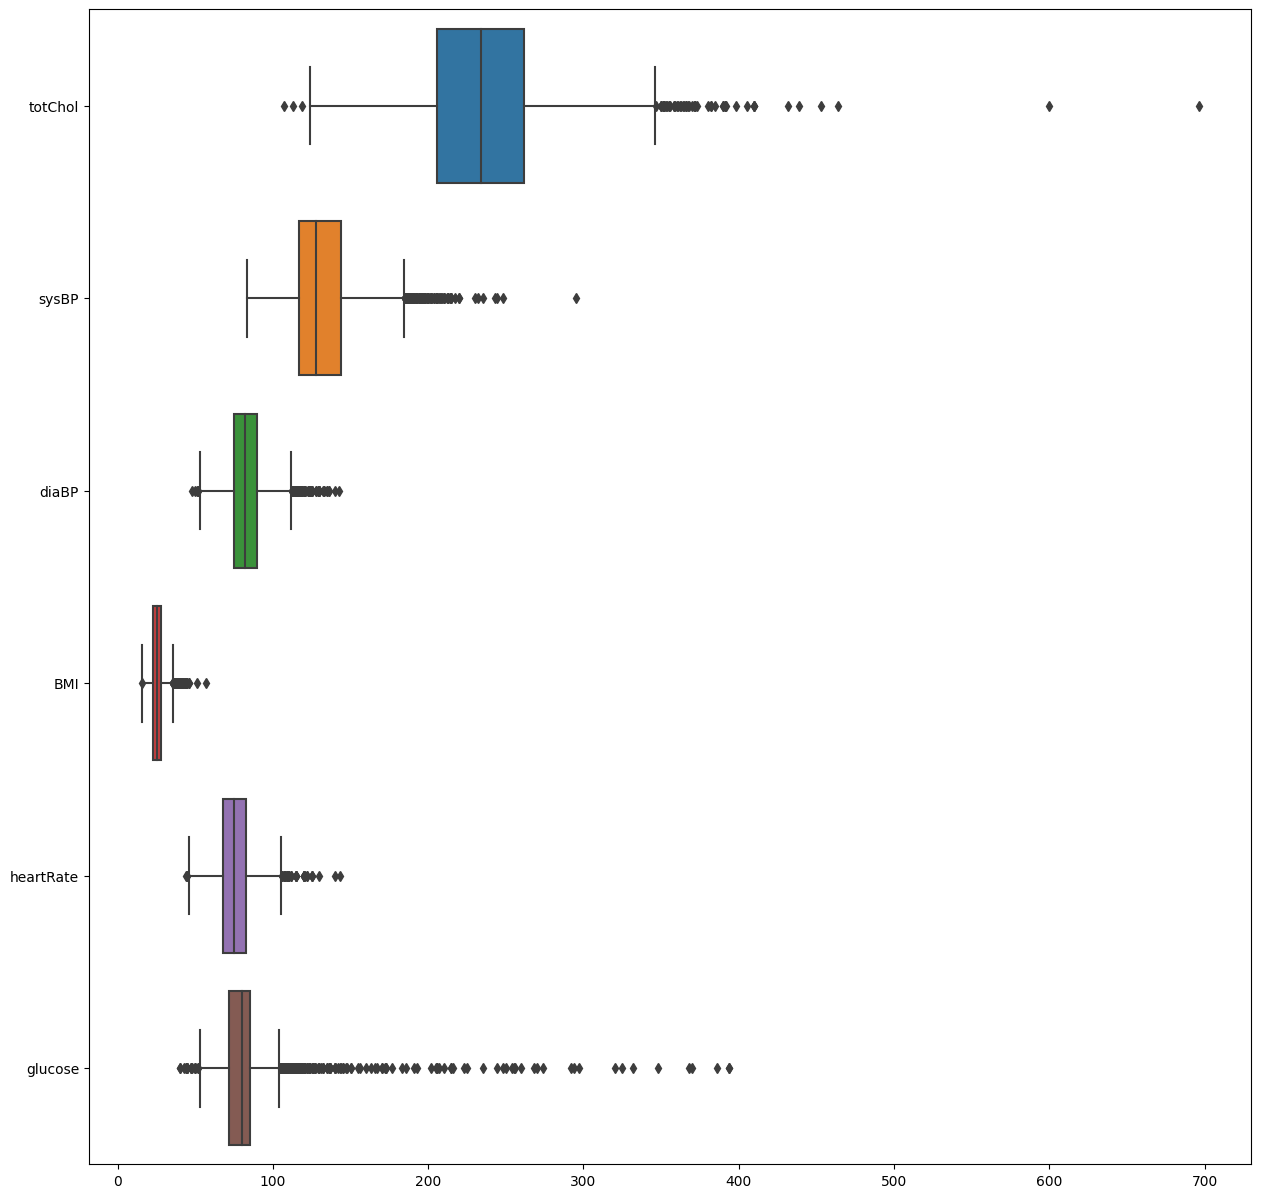

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=df[["totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]], orient="h", ax=ax)
plt.show()

##Here we trying to detect our dataset outliers and we choose to delete these outlie!


*   at first we make variables with our features,then we make new columns with our outliers then we get that and append them in one list  
*   finally we delete our detected outliers



In [ ]:
df_features = df.drop('TenYearCHD', axis=1)
df_features = df.columns.tolist()

In [ ]:
outlier_detection = LocalOutlierFactor(n_neighbors=30)
df['outliers'] = outlier_detection.fit_predict(df[df_features])
outliers_features = df[df['outliers'] == -1]
print(f"found {len(outliers_features)} outliers in indecise {outliers_features.index.tolist()}")
df.drop('outliers', axis=1, inplace=True)

found 59 outliers in indecise [44, 194, 249, 339, 424, 443, 481, 543, 721, 822, 833, 864, 1022, 1044, 1111, 1131, 1182, 1189, 1298, 1624, 1722, 1869, 1992, 1997, 2041, 2180, 2271, 2393, 2406, 2443, 2459, 2498, 2525, 2649, 2665, 2733, 2854, 2855, 2870, 2893, 2909, 2985, 3008, 3142, 3160, 3393, 3474, 3489, 3505, 3557, 3606, 3645, 3806, 3844, 3862, 3875, 4053, 4064, 4084]


In [ ]:
df = df.drop([44, 194, 249, 339, 424, 443, 481, 543, 721, 822, 833, 864, 1022, 1044, 1111, 1131, 1182, 1189, 1298, 1624, 1722, 1869, 1992, 1997, 2041, 2180, 2271, 2393, 2406, 2443, 2459, 2498, 2525, 2649, 2665, 2733, 2854, 2855, 2870, 2893, 2909, 2985, 3008, 3142, 3160, 3393, 3474, 3489, 3505, 3557, 3606, 3645, 3806, 3844, 3862, 3875, 4053, 4064, 4084])

In [ ]:
df.shape

(4179, 15)

###It's time to split our data to train and test with train_test_split function from sklearn.metrics 
####we specify our X and Y
###we bring our values to same scale for predict better

In [ ]:
X = df[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']].values
X.shape

(4179, 14)

In [ ]:
Y = df[['TenYearCHD']]
Y.shape

(4179, 1)

In [ ]:
scaler = StandardScaler()
X = scaler.fit(X).transform(X.astype(float))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=4)

##Now its time to train our model 
###more detail about used parameter:
#####alpha:default=1.0 Constant that multiplies the L1 term, controlling regularization strength. alpha must be a non-negative float

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4179 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4179 non-null   int64  
 1   age              4179 non-null   int64  
 2   currentSmoker    4179 non-null   int64  
 3   cigsPerDay       4179 non-null   float64
 4   BPMeds           4179 non-null   float64
 5   prevalentStroke  4179 non-null   int64  
 6   prevalentHyp     4179 non-null   int64  
 7   diabetes         4179 non-null   int64  
 8   totChol          4179 non-null   float64
 9   sysBP            4179 non-null   float64
 10  diaBP            4179 non-null   float64
 11  BMI              4179 non-null   float64
 12  heartRate        4179 non-null   float64
 13  glucose          4179 non-null   float64
 14  TenYearCHD       4179 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 522.4 KB


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model = Lasso(alpha=0.3)
model.fit(x_train, y_train)

Lasso(alpha=0.3)

In [ ]:
yprediction = model.predict(x_test)
yprediction = (yprediction > 0.5).astype(int)
yprediction.reshape(-1, 1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
print("accuracy of model:", accuracy_score(y_test, yprediction))

accuracy of model: 0.8596491228070176


In [ ]:
print(classification_report(y_test, yprediction))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1078
           1       0.00      0.00      0.00       176

    accuracy                           0.86      1254
   macro avg       0.43      0.50      0.46      1254
weighted avg       0.74      0.86      0.79      1254



In [ ]:
f1_score(y_test, yprediction, average='weighted', labels=np.unique(yprediction))

0.9245283018867925

#thank you for reading this notebook!
##Goodluck and i hope it be helpfull!!
###"Arad Rahmani"